In [171]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [172]:
# Generating the Noise Signal, v(k) and m(k)

def get_noise_signal(Fs,f,sample,amp,phase):
    x = np.arange(sample)
    y = amp*np.sin( (2 * np.pi * f * x / Fs) + phase )
    return y

In [173]:
# Generating Original White Signal, s(k)

def get_white_noise():
    s = np.random.uniform(-0.2,0.2,100)
    return s

In [174]:
#Defining The a class For ADALINE

class Adaline:
    
    def __init__(self,w,b):
        self.weights = w
        self.bias = b
        self.alpha = 0.2
    
    def get_a(self,X):
        w_T = (self.weights).transpose()
        return w_T.dot(X) + self.bias
    
    def get_lmse(self,X,target):
        a = self.get_a(X)
        return float(target - a)
    
    def update_weights_single(self,X,target):
        e = self.get_lmse(X,target)
        self.weights += 2.0*self.alpha*e*X
        self.bias += 2.0*self.alpha*e  
        
    def printwb(self):
            np.set_printoptions(suppress=True,precision=4)
            print("Weights are: ",self.weights)
            print("Bias is: %.4f " % self.bias)

            

In [175]:
# Training ADALINE

def train_adaline(X_set,target_set):
    error_list = []
    activation_list = []
    error = np.inf
    w = np.array([-2]*2,dtype = float)
    b = 0.0
    threshold = 0.000000000001
    cond = error >= threshold
    
    neuron = Adaline(w,b)
    dataset = list(zip(X_set,target_set))
    np.random.shuffle(dataset)
    
    X_set,target_set = zip(*dataset)
    
    while cond:
        
        for X,target in zip(X_set,target_set):
            
            # converting sequence to array for float multiplication for update_weight()
            X = np.array(X)
            error = neuron.get_lmse(X,target)
            
            neuron.update_weights_single(X,target)
            
            activation_list.append(neuron.get_a(X))
            error_list.append(abs(error))
            
            cond = abs(error) >= threshold
            if cond:
                continue
            else:
                break
                
    return activation_list,error_list

In [176]:
#Function to Get Tapped Delay Inputs

def get_tapped_delay_inputs(v):
    X_set = []
    for i in range(1,len(v)):
        X_set.append([v[i],v[i-1]])
    return X_set

In [177]:
# Initializing signals

Fs = 500           # The Frequency at which we sample the data 
f = 50             # Frequency of the sine wave
sample = 100       # Number of samples
amp = 1.2          # Amplitude of the sine wave
phase = (np.pi/2)  # Phase of the sine wave

# Original Noise Source, v(k)
v = get_noise_signal(Fs,f,sample,amp,0)

# Filtered Noise, m(k)
m = get_noise_signal(Fs,f,sample,amp/10,phase)

# Original Signal
s = get_white_noise()

x = np.arange(100)
X_set = get_tapped_delay_inputs(v)

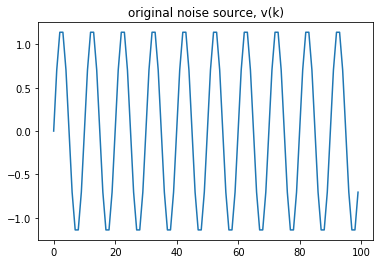

In [178]:
# plotting noise source

plt.title('original noise source, v(k)')
plot_signal(x,v)

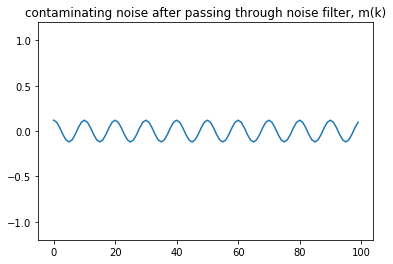

In [179]:
# plotting contaminating noise 

plt.ylim(-1.2, 1.2)
plt.title('contaminating noise after passing through noise filter, m(k)')
plot_signal(x,m)

Text(0.5,1,'Original Signal, s(k)')

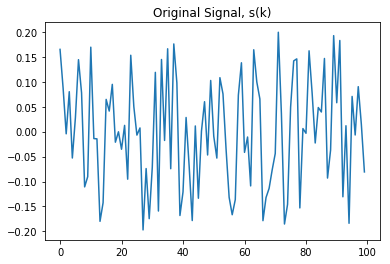

In [180]:
# plotting white noise

plot_signal(x,s[:100])
plt.title('Original Signal, s(k)')

In [181]:
# Running The Adaptive Filter

"""
    a = a list of the neuron's output for every iteration
    e = the lms error between the output of the neuron and the target
"""

a,e = train_adaline(X_set,m)

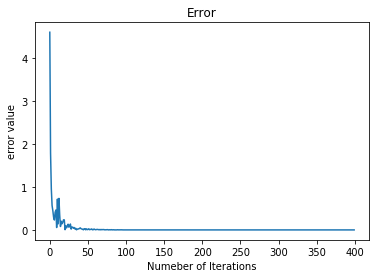

In [182]:
# Plotting lms error v/s number of iterations

plt.xlabel("Numeber of Iterations")
plt.ylabel("error value")
plt.title("Error")
plot_signal(np.arange(len(e)),e)

In [183]:
d = min(len(a),len(m))

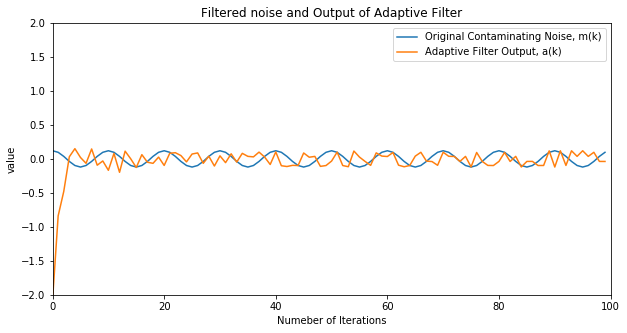

In [184]:
# Plotting the filtered noise and the output of the adaptive filter

plt.figure(figsize=(10,5))
plt.ylim(-2, 2)
plt.xlim(0,100)
plt.title("Filtered noise and Output of Adaptive Filter")
plt.xlabel("Numeber of Iterations")
plt.ylabel("value")

plt.plot(np.arange(d), m[:d], label='Original Contaminating Noise, m(k)')
plt.plot(np.arange(d), a[:d], label='Adaptive Filter Output, a(k)')

plt.legend()

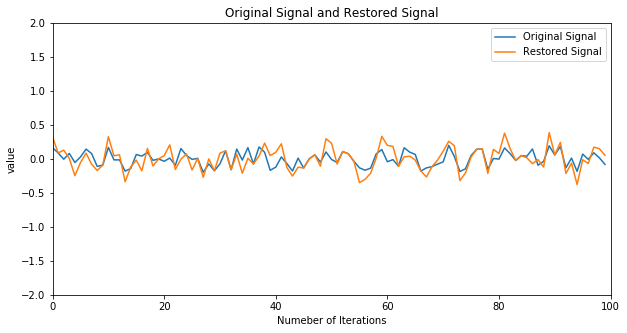

In [185]:
# Plotting Original Signal: s(k), and Restored Signal: s(k) + m(k) - a(k)

plt.figure(figsize=(10,5))
plt.ylim(-2, 2)
plt.xlim(0,100)
plt.title("Original Signal and Restored Signal")
plt.xlabel("Numeber of Iterations")
plt.ylabel("value")

plt.plot(np.arange(d), s[:d], label='Original Signal')
plt.plot(np.arange(d), s[:d] + m[:d] - a[-d:], label ='Restored Signal' )

plt.legend()